In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, SymLogNorm
import numpy as np
from astropy.table import Table, join
from IPython.display import set_matplotlib_formats
from scipy.spatial import distance
import Euclid
import os

#set_matplotlib_formats('pdf')
%erun PHZ_NNPZ 0.10.0

from nnpz.reference_sample.ReferenceSample import ReferenceSample
from nnpz.photometry.PhotometryProvider import PhotometryProvider
from nnpz.photometry.SourceIndependantGalacticUnReddening import SourceIndependantGalacticUnReddening

%erun Phosphoros 0.17
from PhzCLI.PlotSpecZComparison import SpeczPhotozPlot, displayHistogram, compute_stats

In [2]:
ref = ReferenceSample('/home/aalvarez/Downloads/SC8R6/ZReferenceSample/')

INFO    : Found provider PdzProvider
2021-01-14T09:35:12CET ReferenceSample  INFO : Found provider PdzProvider
INFO    : Found provider SedProvider
2021-01-14T09:35:13CET ReferenceSample  INFO : Found provider SedProvider


In [3]:
withz = Table.read('/home/aalvarez/Downloads/SC8R6/ZReferenceSample/RefWithZ.fits')

In [7]:
phz = np.zeros(len(withz))
for i, oid in enumerate(withz['SOURCE_ID']):
    pdz = ref.getPdzData(oid)
    phz[i] = np.average(pdz[:,0], weights=pdz[:,1])

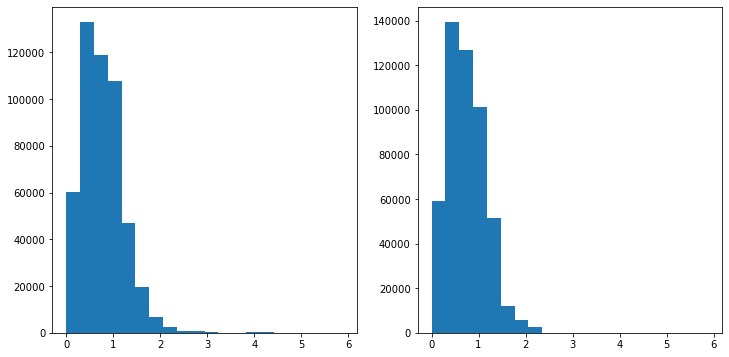

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
bins = axes[0].hist(phz, bins=20)
axes[1].hist(withz['Z_OBS'], bins=bins[1])
plt.show()

In [28]:
data, mean, median, sigma, mad, outliersPercent,sigmaNoOutliers, meanNoOutliers = compute_stats(withz['Z_OBS'], phz)

--> Mean                :  0.011228723657107947
--> Median              :  0.006764338426404432
--> Sigma               :  0.09170855143918794
--> Mad                 :  0.015460867611739123
--> Outliers            :  1.265731260067404 %
--> Sigma (no outliers) :  0.022596454733942006


In [ ]:
SpeczPhotozPlot(withz['ID'], withz['Z_OBS'], phz, data)